# Введение в sklearn. KNN

## Терминология

**loss** – функция потерь, функционал потерь (минимизируем при обучении модели)

**metric** – метрика качества, функционал качества (используем для сравнения двух моделей)

## Общая схема решения задачи машинного обучения

__Вспомнить из лекции:__
* Что такое задача машинного обучения? Что дано и что необходимо найти?
* Какие бывают типы признаков в машинном обучении?
* Какие бывают виды задач в машинном обучении?
* Что такое функционал качества? Для чего он нужен?

Вспомним общую схему решения задачи машинного обучения:

<div>
<img src="scheme.png" width="500"/>
</div>

Из исходной базы данных после предобработки мы получаем обучающую выборку $X, Y$. Матрица объекты-признаки $X$ имеет размер (число объектов) $\times$ (число признаков). Одна строка этой матрицы соответствует одному объекту обучающей выборки, заданному как вектор длины (число признаков). Признаки - числовые характеристики объекта. Вектор правильных ответов $Y$ имеет длину (число объектов). 

На этапе обучения на основе обучающей выборки $X, Y$ строится (обучается) алгоритм $a(x)$. Это некая функция, которая берет на вход признаки объекта и возвращает предсказание для этого объекта: $y \approx a(x)$. Алгоритм $a$ может делать предсказания для любых допустимых объектов; его можно применять как к обучающим объектам, так и к тем, которых алгоритм никогда не видел. В этом и состоит цель машинного обучения: выявить такие закономерности в обучающей выборке, которые позволят делать качественные (довольно точные) предсказания на новых объектах $x$. 

Тому, как обучать такие алгоритмы $a(x)$ по обучающей выборке, во многом ипосвящен наш курс. 

## Интерфейс Scikit-Learn

Scikit-Learn, или коротко Sklearn - библиотека, в которой реализованы практически все используемые сегодня алгоритмы машинного обучения. Нам необходимо познакомиться с интерфейсом библиотеки, чтобы понимать, как ее можно использовать на практике. Далее в курсе мы будем не только использовать готовые реализации из sklearn, но иногда и сами реализовывать алгоритмы в том же духе, в котором это сделано в этой библиотеке (с тем же интерфейсом).

Для реализации алгоритмов машинного обучения в sklearn всегда используется один интерфейс - класс с функциями `fit(X, Y)` для обучения модели по обучающей выборке $X, Y$ и `predict(X)` для возвращения предсказаний на выборке $X$. При создании класса можно указывать дополнительные параметры, влияющие на работу алгоритма машинного обучения.

Например, такова будет логика работы класса линейной регрессии, которую мы подробно изучим на следующих семинарах:
* При создании класса нужно запомнить коэффициент регуляризации;
* Задача функции fit - по выборке X и Y найти веса w и сохранить их внутри класса в self.w;
* Задача функции predict - по весам self.w и X вернуть предсказания $Y$.

In [1]:
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train) = обучающая

In [2]:
class LinearRegressor:
    def __init__(self, reg_coef: float = None) -> None:
        self.lambda_ = reg_coef
    
    def fit(self, X_train: np.array, y_train: np.array) -> None:
        self.w =  # формула для вычисления весов, X, y и self.lambda_
    
    def predict(self, X_test = smth) -> np.array:
        y_pred =  # функция от X и self.w
        
        return y_pred

SyntaxError: invalid syntax (<ipython-input-2-25d2422da0a6>, line 6)

Если бы не использовали класс, нам пришлось бы передавать веса w в функцию predict каждый раз, когда мы захотели бы сделать предсказания, это неудобно (особенно если таких вспомогательных переменных много). А так веса хранятся внутри класса, и мы можем даже не догадываться об их существовании (если класс писали не мы).

Пример импорта классификатора из sklearn:

In [3]:
from sklearn.dummy import DummyClassifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from sklearn import * 

Помимо алгоритмов обучения и предсказания для разных методов, в sklearn реализовано много вспомогательного функционала для предобработки данных, визуализации данных, вычисления метрик качества и т. д. В ходе следующих семинаров мы постепенно познакомимся с этим функционалом библиотеки.

Сегодня мы познакомимся с методами предобработки данных и их реализацией в sklearn.

### Предобработка данных
Для демонстраций загрузим набор данных [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile). В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [7]:
X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Разделим признаки и целевую переменную:

In [8]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

### Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:
* заполнить средними (mean, median);
* предсказывать пропущенные значения по непропущенным.

Последний вариант сложный и применяется редко. Для заполнения константами можно использовать метод датафрейма fillna, для замены средними - класс `impute.SimpleImputer`.

In [9]:
from sklearn.impute import SimpleImputer

In [12]:
(X_raw.dtypes == 'object').values

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False])

In [ ]:
["Н1", "Н2", "Н3"]
 К.     Ч.    Ч. 

cat_f... = [True, False, False]
~cat_f... = [False, True, True]

X[~cat_f...]

In [14]:
X_raw.columns[~cat_features_mask]

Int64Index([0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24], dtype='int64')

In [15]:
X_raw[X_raw.columns[~cat_features_mask]]

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27


In [13]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
# категориальные признаки имеют тип "object"
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
# Обработчики
# fit()
# transform()
# fit_transform()

# 1. Все обработчики обучаются на трейне
# 2. Применяются и к трейну, и к тесту

Всегда нужно анализировать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

__Пример:__ предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков рекомендуется создавать отдельную категорию, соответствующую пропущенному значению. В наши данных пропусков в категориальных признаках нет.

### Преобразование нечисловых признаков
Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам. 

__Пример:__ некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества $K$. К таким признакам обычно применяют [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) (вместо одного признака создают $K$ бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать с помощью классов LabelEncoder + OneHotEncoding, но проще использовать функцию `pd.get_dummies`.

Следует заметить, что в новой матрице будет очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр `OneHotEncoder(sparse = True)` или `.get_dummies(sparse=True)`, и метод вернет [разреженную матрицу](http://docs.scipy.org/doc/scipy/reference/sparse.html), в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

In [ ]:
# One-Hot Encoding

# Weather
# 1. Sunny
# 2. Windy
# 3. Sunny

# Weather_Sunny   Weather_Windy
# 1. 1                0
# 2. 0                1
# 3. 1                0


# Label Encoding

# Weather
# 1. Sunny
# 2. Windy
# 3. Sunny

# Sunny = 0, Windy = 1, ...

# Weather
# 1. 0
# 2. 1
# 3. 0

In [16]:
print(f"Shape before encoding: {X_no_mis.shape}")
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
X_dum

Shape before encoding: (205, 25)


,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


Помимо категориальных, преобразования требуют, например, строковые признаки. Их можно превращать в матрицу частот слов [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer), матрицу частот буквосочетаний фиксированной длины, можно извлекать другие признаки (например, длина строки).

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу. Это важно для численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем с области больших чисел). Кроме того, у каждого метода машинного обучения есть свои особенности, требующие масштабирования признаков. Например, для линейных моделей - это ускорение обучения и повышение интерпретируемости модели.

Первый популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение (`StandardScaler` в sklearn). Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (`MinMaxScaler` в sklearn).

In [17]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Пример реализации

Реализуем класс для нормализации данных по аналогии с интерфейсом sklearn для нормализации.

Предобработка данных в sklearn реализована по похожему шаблону, что и обучение моделей: функция `.fit(X)` запоминает внутренние переменные, а функция `.transform(X)` выполняет преобразование выборки. y здесь не нужен, потому что в нормализации целевые переменные не участвуют (как и почти во всей предобработке данных).

Параметров у класса нет, так что функцию `__init__` мы пропускаем. Функция `.fit()` считает статистики - среднееи стандартное отклонение каждого признака (по обучающей выборке), а функция `.tranform()` вычитает среднее и делит на стандартное отклонение. Для вычисления статистик используем numpy.

In [18]:
# StandardScaler

class Normalizer:
    def fit(self, X: np.array) -> None:
        self.mu = X.mean(axis=0)
        self.sigma = X.std(axis=0)
        
    def transform(self, X: np.array) -> np.array:
        return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]

Создаем случайные данные X и y для тестирования нашего класса:

In [19]:
num_obj_train = 20
num_obj_te = 10
num_feat = 4
X_train = np.random.randint(-5, 5, size=(num_obj_train, num_feat))
X_train.shape

(20, 4)

In [20]:
X_train

array([[ 3,  2, -1,  4],
       [-1, -2,  4, -4],
       [ 3, -2, -5,  1],
       [ 0,  0, -3,  4],
       [-2, -1, -1, -1],
       [ 4,  0,  2,  1],
       [ 4,  2, -1, -4],
       [-3,  1, -4,  0],
       [ 1, -2,  3,  3],
       [-2, -1,  2, -2],
       [ 1,  2,  2,  1],
       [-3,  0,  0,  1],
       [ 4, -5, -2,  1],
       [-3,  4, -4, -2],
       [-2,  4, -3,  0],
       [ 4, -4,  0, -1],
       [-3,  0,  1, -1],
       [ 4,  4, -5, -3],
       [-1, -3,  2,  2],
       [-4,  1,  1, -2]])

In [21]:
X_test = np.random.randint(-5, 5, size=(num_obj_te, num_feat))
X_test.shape

(10, 4)

In [ ]:
X_train

Создаем объект класса и трансформируем выборку:

In [22]:
normalizer = Normalizer()
normalizer.fit(X_train)
X_train_transformed = normalizer.transform(X_train)
X_test_transformed = normalizer.transform(X_test)

Fit нужно вызывать именно на обучающих данных, чтобы ничего не подсмотреть в контрольной выборке. А transform можно вызывать много раз для любых выборок (с уже посчитанным статистиками, которые хранятся внутри класса).

In [ ]:
X_train_transformed

## Метрические методы. k Nearest Neighbours

### Теоретическая часть


__Вспомнить из лекции:__
* Как в методе k ближайших соседей выполняются предсказания в задаче классификаци и регрессии?
* Что такое гипотеза компактности?
* Какие функции расстояния можно использовать для вещественных признаков, категориальных признаков, строковых признаков, множественнозначных признаков?

#### Задача 1.
Предположим, мы решаем задачу классификации на три класса по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 1         | -1        | 1     |
| 2         | 2         | 1     |
| 3         | 2         | 2     |
| 1         | 0         | 3     |
| 2         | -2        | 3     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__

Алгоритм предсказания kNN для задачи классификации:
1. Вычислить расстояние от каждого объекта обучающей выборки до тестового объекта.
1. Найти k объектов обучающей выборки (соседей) с наименьшим расстоянием до тестового объекта.
1. Вернуть наиболее встречающийся класс среди k соседей.

Вычислим расстояния. Расстояние от первого объекта в обучении до тестового объекта $x$ (манхэттэнская метрика):

$$|1-2| + |-1-(-1)| = 1.$$

Аналогично для 2-5 объектов: получатся расстояния 3, 4, 2, 1.

Находим 3 ближайших объекта: это объекты с номерами 1, 4, 5 (расстояния 1, 2, 1 соответственно). Эти три объекта относятся к классам 1, 3, 3. Чаще всего встречается класс 3, поэтому предсказываем 3.

#### Задача 2.
Визуализируйте разделяющую поверхность между классами для следующей выборки:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 2         | 2        | 1     |
| 3         | 2         | 1     |
| 2         | 0         | 2     |
| 1         | -1         | 3     |
| 1        | 1        | 3     |

Используйте k=1 и евклидово расстояние.

__Решение.__

В задачах классификации с двумя признаками мы можем изобразить признаковое пространство на плоскости и раскрасить его в разные цвета в соответствии с классом каждой точки плоскости. В этом и состоит сейчас наша задача.

Для начала отобразим на плоскости обучающую выборку - пять точек - в соответствии с их координатами.

При $k=1$ каждая точка плоскости будет относиться к тому же классу, что и ближайший к ней объект обучающей выборки. Если нам даны две точки разных классов, то чтобы провести между ними границу классов, нужно построить серединный перпендикудяр. Для случая с несколькими точками нужно построить несколько серединных перпендикуляров, найти их точки пересечения и определить, какие области к каким классам относятся. Более строго такая конструкция задается с помощью [Диаграммы Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE), но мы не будем вдаваться в ее детали.

<div>
<img src="classifi.png" width="350"/>
</div>

#### Задача 3.
Предположим, мы решаем задачу регрессии по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Ответ |
|-----------|-----------|-------|
| 1         | -1        | 3.5     |
| 2         | 2         | 2.3     |
| 3         | 2         | 1.7     |
| 1         | 0         | -0.4     |
| 2         | -2        | 0.1     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__
Предсказания kNN для регрессии отличаются от предсказаний для классификации только финальным шагом: вместо поиска наиболее часто встречающегося класса нужно усреднить ответы на соседях. Признаки в этой задаче те же, что в задаче 1, поэтому соседей мы уже знаем: это объекты с номерами 1, 4, 5. На них мы имеем ответы 3.5, -0.3, 0.1. Усредним их: (3.5-0.4+0.1)/3 = 1.1. Предсказываем 1.1.

#### Вопрос: каковы параметры и гиперпараметры метода kNN?
__Ответ:__

Параметры - это величины, которые мы настраиваем в процессе обучения по обучающей выборке. В методе kNN нет как такового обучения - это очень простой эвристический алгоритм. Под параметрами в kNN можно понимать обучающую выборку. В другой трактовке у метода нет параметров.

Гиперпараметры - это величины, которые мы должны установить до начала обучения модели. Гиперпараметры не настраиваются по обучающей выборке в процессе обучения модели. Два самых важных гиперпараметры метода kNN - это число соседей k и метрика. Используя разные комбинации этих гиперпараметров, можно получать совершенно разное качество работы алгоритма. Гиперпараметры обычно настраивают по валидационной выборке или используя кросс-валидацию.

#### Какова динамика качества работы kNN при увеличении k?

__Ответ:__

При $k=1$ вокруг каждого объекта обучающей выборки создается область его класса. Если, к примеру, в "большую" область одного класса случайно попал один шумовой объект другого класса, вокруг этого шумового объекта будет "остров" предсказания другого класса. Это нелогично и говорит о переобучении.

При $k$, равном числу объектов в выборке, для всех объектов будет предсказываться одно и то же, что вновь говорит о низком качестве работы классификатора. Получается, что качество kNN при увеличении $k$ должно сначала расти, а потом падать, и оптимум будем где-то посередине.

Рассмотрим синтетический пример: на рисунке визуализирована обучающая выборка ("настоящая" разделяющая поверхность - прямая) и разделяющая поверхность kNN по аналогии с задачей 2, и на разных графиках используется разное число соседей $k$:

<div>
<img src="k_grid.png" width="550"/>
</div>

При использовании малых $k$ разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится все ровнее и ровнее и при $k=50$ выглядит наиболее разумно. При большем k разделяющая поверхность уходит от линейной, и оранжевый класс "захватывает" синий.

#### Почему при использовании kNN важно нормировать данные?

__Ответ:__

Рассмотрим для примера манхэттэнскую метрику. Если один признак будет иметь масштаб около 1000, а другой - около 1, то когда мы будем складывать модули разностей для этих двух признаков, второй признак практически не будет иметь влияния на ответ. Если же признаки отнормировать, но они все будут в одной шкале.

### Практическая часть

In [2]:
import numpy as np
import pandas as pd
import sklearn

# изображения цифр
from sklearn.datasets import load_digits
# классификатор
from sklearn.neighbors import KNeighborsClassifier
# шаффлер данных
from sklearn.utils import shuffle

In [4]:
clf = KNeighborsClassifier(n_neighbors=3)

data = load_digits()
X = data.images
y = data.target

X.shape

(1797, 8, 8)

In [5]:
X[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [6]:
import matplotlib.pyplot as plt

In [7]:
y[900]

4

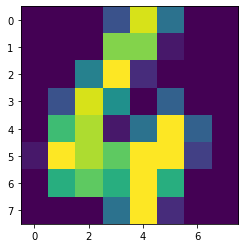

In [8]:
plt.imshow(X[900])

In [9]:
X.shape

(1797, 8, 8)

In [10]:
# вытягиваем квадратное изображение в вектор, чтобы получить матрицу объекты-признаки
X = X.reshape(X.shape[0], -1)

# перемешиваем данные
np.random.seed(123) # В домашках! 

X, y = shuffle(X, y)
print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

Features shape: (1797, 64),
Target shape: (1797,)
Target samples: [3 3 4 4 1 3 1 0 7 4]


In [11]:
X_train, y_train = X[:700, :], y[:700]
X_val, y_val = X[700:1300, :], y[700:1300]
X_test, y_test = X[1300:, :], y[1300:]

In [12]:
# Обучаем классификатор и делаем предсказания
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [13]:
y_predicted

array([5, 1, 3, 8, 4, 9, 9, 0, 1, 8, 4, 2, 1, 9, 2, 8, 0, 5, 9, 9, 1, 6,
       4, 3, 9, 4, 0, 3, 1, 7, 5, 6, 8, 7, 9, 3, 5, 4, 3, 0, 3, 2, 4, 2,
       1, 1, 4, 6, 9, 7, 1, 9, 4, 5, 5, 0, 3, 7, 5, 5, 3, 4, 4, 7, 0, 1,
       8, 2, 2, 2, 0, 0, 3, 7, 7, 1, 0, 1, 4, 7, 8, 2, 1, 3, 8, 1, 7, 1,
       3, 8, 8, 6, 7, 3, 6, 2, 7, 4, 9, 5, 4, 5, 6, 9, 4, 2, 3, 9, 0, 2,
       3, 1, 2, 2, 0, 9, 9, 1, 3, 2, 9, 1, 8, 7, 5, 7, 6, 2, 6, 0, 3, 3,
       8, 5, 5, 4, 5, 4, 5, 5, 9, 1, 9, 7, 5, 6, 8, 3, 1, 9, 2, 2, 1, 5,
       3, 3, 3, 5, 9, 0, 9, 3, 1, 9, 4, 4, 5, 4, 6, 6, 7, 1, 9, 5, 5, 5,
       8, 4, 8, 8, 3, 5, 8, 5, 1, 0, 4, 5, 8, 9, 0, 5, 1, 9, 9, 7, 8, 0,
       3, 8, 9, 4, 6, 8, 2, 9, 2, 2, 4, 7, 2, 9, 8, 3, 7, 3, 6, 9, 1, 1,
       4, 3, 1, 7, 5, 8, 7, 9, 0, 9, 8, 9, 4, 3, 6, 1, 8, 3, 4, 3, 7, 8,
       4, 7, 5, 9, 6, 1, 0, 7, 1, 5, 5, 6, 7, 5, 2, 5, 6, 7, 8, 7, 3, 1,
       1, 5, 9, 4, 8, 0, 7, 0, 5, 4, 8, 0, 0, 3, 2, 6, 0, 9, 5, 1, 2, 1,
       7, 2, 3, 9, 9, 9, 6, 2, 7, 5, 8, 3, 9, 6, 4,

In [14]:
# Вычисляем простейшую метрику качества алгоритма - долю правильных ответов
print("Accuracy is: ", np.mean(y_test==y_predicted))

Accuracy is:  0.9818913480885312


In [15]:
X.shape

(1797, 64)

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE()

In [21]:
vectors = tsne.fit_transform(X)

In [22]:
import matplotlib.pyplot as plt

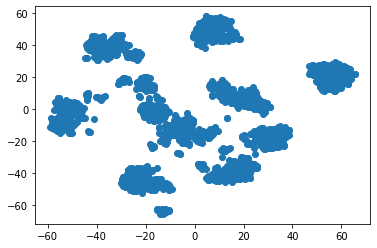

In [23]:
plt.scatter(vectors[:, 0], vectors[:, 1])

Учитывая, что у нас 10 классов, то вероятность угадать правильный ответ много раз очень мала. Поэтому полученное значение accuracy - очень хороший результат!

Попробуем использовать разные значения гиперпараметра k. Сравнивать разные значения k по обучающей выборке бесполезно: каждый объект является ближайшим сам к себе и оптимальное k будет равно 1. Будем сравнивать разные k по качеству на валидационной выборке:

In [51]:
# Подбор k на валидационной выборке:
k_best = -1
best_accuracy = 0

for k in range(1, 20):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    val_accuracy = np.mean(y_predicted==y_val)                      
    print(f"k = {k}; accuracy = {val_accuracy:.3f}")
                           
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k_best

k = 1; accuracy = 0.985
k = 2; accuracy = 0.977
k = 3; accuracy = 0.982
k = 4; accuracy = 0.977
k = 5; accuracy = 0.973
k = 6; accuracy = 0.977
k = 7; accuracy = 0.965
k = 8; accuracy = 0.965
k = 9; accuracy = 0.958
k = 10; accuracy = 0.957
k = 11; accuracy = 0.955
k = 12; accuracy = 0.952
k = 13; accuracy = 0.950
k = 14; accuracy = 0.947
k = 15; accuracy = 0.947
k = 16; accuracy = 0.943
k = 17; accuracy = 0.933
k = 18; accuracy = 0.922
k = 19; accuracy = 0.922


1

Сравним accuracy на обучении, валидации и тесте для найденного лучшего значения k:

In [52]:
clf = KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train, y_train)

for X_data, y_data in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    y_predicted = clf.predict(X_data)
    print(f"Accuracy: {np.mean(y_predicted==y_data):.3f}")

Accuracy: 1.000
Accuracy: 0.985
Accuracy: 0.978


In [ ]:
# Почему это может быть не так с kNN?
#         |
#         |
#         |
#         |
#         V

Качество на обучающей выборке самое лучшее, но оно обманчиво, ведь алгоритм уже знает эти объекты.
На валидационной выборке мы тоже использовали ответы - уже для подбора гиперпараметра k, так что этот показатель тоже не совсем честный. 
И действительно, качество на тестовой выборке (ответы для которой мы нигде не подсматривали) может оказаться хуже, чем на валидационной выборке.

_Вывод_: оценивать качество алгоритма нужно на отложенной выборке, которая не используется нигде в обучении и не используется в подборе гиперпараметров.